## Explore data

In [1]:
import pandas as pd

In [2]:
job_change = pd.read_csv('data/aug_train.csv')

In [3]:
job_change.head(10)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
5,21651,city_176,0.764,NaN,Has relevent experience,Part time course,Graduate,STEM,11,NaN,NaN,1,24,1.0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,NaN,5,50-99,Funded Startup,1,24,0.0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13,<10,Pvt Ltd,>4,18,1.0
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7,50-99,Pvt Ltd,1,46,1.0
9,699,city_103,0.920,NaN,Has relevent experience,no_enrollment,Graduate,STEM,17,10000+,Pvt Ltd,>4,123,0.0


In [4]:
job_change["target"].unique()

array([1., 0.])

In [5]:
job_change.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [6]:
import matplotlib.pyplot as plt

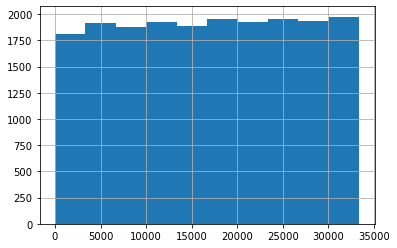

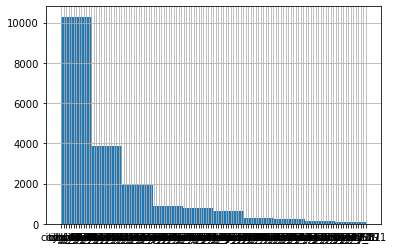

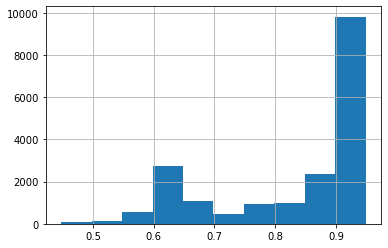

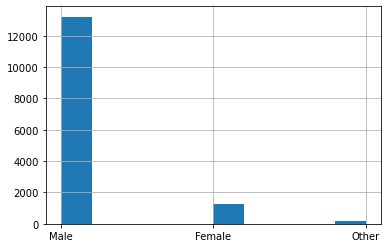

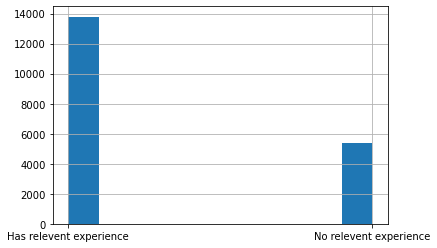

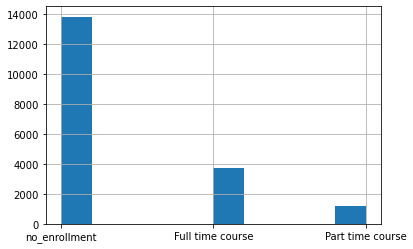

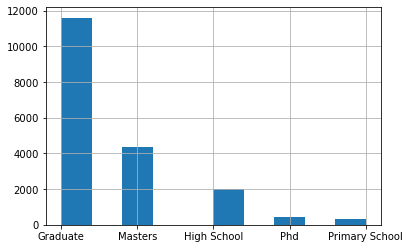

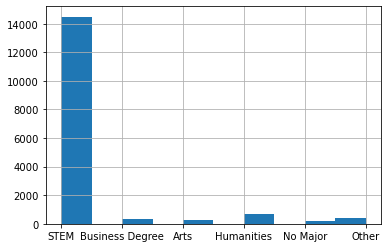

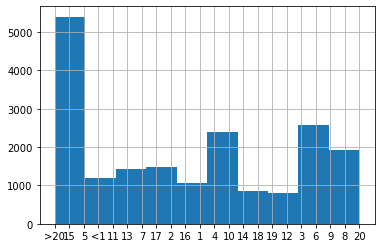

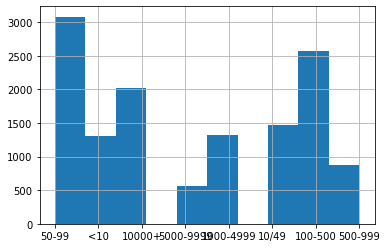

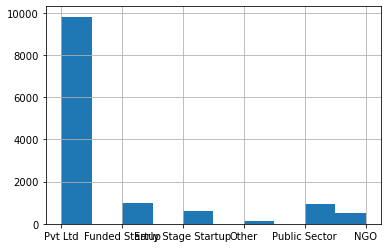

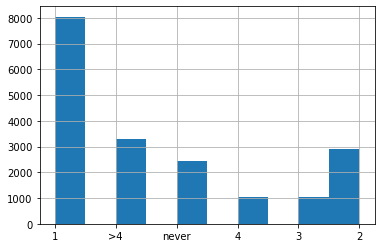

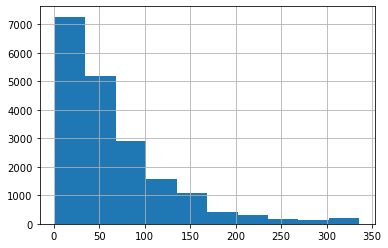

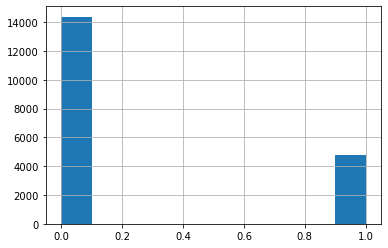

In [7]:
for attributes in job_change.columns:
    plt.figure()
    job_change[attributes].hist()

# Split train test set

In [8]:
from sklearn.model_selection import ShuffleSplit

split = ShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(job_change):
    strat_train_set = job_change.reindex(index=train_index)
    strat_test_set = job_change.reindex(index=test_index)

In [9]:
strat_train_set["target"].unique()

array([0., 1.])

In [10]:
strat_train_set.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8253,20667,city_21,0.624,NaN,Has relevent experience,no_enrollment,Masters,STEM,7,<10,Early Stage Startup,1,40,0.0
10067,4093,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,19,100-500,Pvt Ltd,2,48,0.0
1851,24146,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,NaN,1,135,0.0
4139,28323,city_19,0.682,Male,No relevent experience,Full time course,Graduate,STEM,2,NaN,NaN,never,45,1.0
2473,16720,city_21,0.624,Male,No relevent experience,Full time course,High School,NaN,10,NaN,NaN,never,68,0.0


In [11]:
strat_test_set.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
16144,6992,city_16,0.910,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,500-999,Pvt Ltd,1,21,0.0
13661,8637,city_103,0.920,Female,Has relevent experience,no_enrollment,Masters,Humanities,>20,100-500,Funded Startup,2,74,0.0
344,24729,city_104,0.924,NaN,Has relevent experience,no_enrollment,Graduate,STEM,9,10/49,Pvt Ltd,1,94,0.0
1034,10933,city_21,0.624,Male,Has relevent experience,no_enrollment,Masters,STEM,15,10000+,Pvt Ltd,1,75,0.0
8109,28023,city_134,0.698,Male,No relevent experience,no_enrollment,Masters,STEM,12,500-999,NGO,1,157,0.0


In [12]:
print(len(strat_train_set))
print(len(strat_test_set))

13410
5748


In [13]:
strat_train_set.to_csv("Data/train.csv")

In [14]:
strat_test_set.to_csv("Data/test.csv")